In [1332]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Olympic Data

## Transfer Data from URL to DataFrame

In [1335]:
olympic_data = requests.get('https://raw.githubusercontent.com/realpython/python-data-cleaning/refs/heads/master/Datasets/olympics.csv').content

with open('olympics.csv', 'wb') as file:
    file.write(olympic_data)
    file.close()  # i've been told this is redundant but good practice

olympics = pd.read_csv('olympics.csv', header=1)
olympics.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Rename Horrific Column Headers

using inplace=**True** argument is bad practice but i will use it anyway bc it makes me feel cool

In [1338]:
olympics.rename(columns={'Unnamed: 0': 'team_name', 
                         '? Summer': 'summer_games', 
                         '01 !': 'summer_golds', 
                         '02 !': 'summer_silvers',
                         '03 !': 'summer_bronzes',
                         'Total': 'summer_medals',
                         '? Winter': 'winter_games',
                         '01 !.1': 'winter_golds',
                         '02 !.1': 'winter_silvers',
                         '03 !.1': 'winter_bronzes',
                         'Total.1': 'winter_medals',
                         '? Games': 'total_games',
                         '01 !.2': 'total_golds',
                         '02 !.2': 'total_silvers',
                         '03 !.2': 'total_bronzes',
                         'Combined total': 'total_medals'}, inplace=True)
olympics.head()

,team_name,summer_games,summer_golds,summer_silvers,summer_bronzes,summer_medals,winter_games,winter_golds,winter_silvers,winter_bronzes,winter_medals,total_games,total_golds,total_silvers,total_bronzes,total_medals
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Split and Slice Strings in a Series

team name + team code together = ugly

In [1341]:
# separate team name and code
teams = olympics.team_name.str.split(pat="(", expand=True).rename(columns={0: 'team_name', 1: 'team_code'})

# remove extra whitespace, if any
teams.team_name = teams.team_name.str.strip()

# only keep first team code because some are duplicated for some reason
teams.team_code = teams.team_code.str.slice(start=0, stop=3, step=1)
teams

,team_name,team_code
0,Afghanistan,AFG
1,Algeria,ALG
2,Argentina,ARG
3,Armenia,ARM
4,Australasia,ANZ
5,Australia,AUS
6,Austria,AUT
7,Azerbaijan,AZE
8,Bahamas,BAH
9,Bahrain,BRN


## Replace Data in a Series and Index

replace nasty team names with pretty ones

In [1344]:
olympics.team_name = olympics.team_name.replace(to_replace=olympics.team_name.values, value=teams.team_name.values)
olympics

,team_name,summer_games,summer_golds,summer_silvers,summer_bronzes,summer_medals,winter_games,winter_golds,winter_silvers,winter_bronzes,winter_medals,total_games,total_golds,total_silvers,total_bronzes,total_medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


set team codes as indices

In [1346]:
olympics.set_index(teams.team_code, inplace=True)
olympics

,team_name,summer_games,summer_golds,summer_silvers,summer_bronzes,summer_medals,winter_games,winter_golds,winter_silvers,winter_bronzes,winter_medals,total_games,total_golds,total_silvers,total_bronzes,total_medals
team_code,,,,,,,,,,,,,,,,
AFG,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
ALG,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
ARG,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
ARM,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
ANZ,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
AUS,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
AUT,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
AZE,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
BAH,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12


## Code in as few lines as possible

In [1348]:
import numpy as np
import pandas as pd
import requests

# initiate a new file for writing bytes to text
with open('olympic.csv', 'wb') as file:
    # fetch data the url and convert to text to be written into file
    file.write(requests.get('https://raw.githubusercontent.com/realpython/python-data-cleaning/refs/heads/master/Datasets/olympics.csv').content)

In [1349]:
# convert data in file to a new DataFrame instance where the second row of data is made into the header row
# rename the stupid column headers (which in this case are all of them)
olympic = pd.read_csv('olympic.csv', header=1).rename(columns={
    'Unnamed: 0': 'team_name',
    '? Summer': 'summer_games',
    '01 !': 'summer_golds',
    '02 !': 'summer_silvers',
    '03 !': 'summer_bronzes',
    'Total': 'summer_medals',
    '? Winter': 'winter_games',
    '01 !.1': 'winter_golds',
    '02 !.1': 'winter_silvers',
    '03 !.1': 'winter_bronzes',
    'Total.1': 'winter_medals',
    '? Games': 'total_games',
    '01 !.2': 'total_golds',
    '02 !.2': 'total_silvers',
    '03 !.2': 'total_bronzes',
    'Combined total': 'total_medals'})

# split team names and their codes
olympic[["team_name", "team_code"]] = pd.DataFrame(olympic.team_name.str.split(pat="(", expand=True))

# keep only the necessary characters in the country codes and set them as the indices in the olympic dataframe
# idk why the drop argument in set_index doesn't work here :(
olympic = olympic.set_index(olympic.team_code.str.slice(0, 3, 1)).drop(columns="team_code")

olympic

,team_name,summer_games,summer_golds,summer_silvers,summer_bronzes,summer_medals,winter_games,winter_golds,winter_silvers,winter_bronzes,winter_medals,total_games,total_golds,total_silvers,total_bronzes,total_medals
team_code,,,,,,,,,,,,,,,,
AFG,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
ALG,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
ARG,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
ARM,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
ANZ,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
AUS,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
AUT,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
AZE,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
BAH,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12


# University Towns Dataset

## Download Content and Save to a .txt File

### *Response*.content.decode('utf-8')
gotta do a bunch of fancy stuff with utf-8 because some characters have been giving me problems

In [1353]:
import requests

response = requests.get("https://raw.githubusercontent.com/realpython/python-data-cleaning/refs/heads/master/Datasets/university_towns.txt")
towns_data = response.content.decode('utf-8').replace('*', '\n')

with open('university_towns.txt', mode='w') as file:
    file.write(towns_data)
    file.close()

str(towns_data)

'Alabama[edit]\nAuburn (Auburn University)[1]\nFlorence (University of North Alabama)\nJacksonville (Jacksonville State University)[2]\nLivingston (University of West Alabama)[2]\nMontevallo (University of Montevallo)[2]\nTroy (Troy University)[2]\nTuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]\nTuskegee (Tuskegee University)[5]\nAlaska[edit]\nFairbanks (University of Alaska Fairbanks)[2]\nArizona[edit]\nFlagstaff (Northern Arizona University)[6]\nTempe (Arizona State University)\nTucson (University of Arizona)\nArkansas[edit]\nArkadelphia (Henderson State University, Ouachita Baptist University)[2]\nConway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]\nFayetteville (University of Arkansas)[7]\nJonesboro (Arkansas State University)[8]\nMagnolia (Southern Arkansas University)[2]\nMonticello (University of Arkansas at Monticello)[2]\nRussellville (Arkansas Tech University)[2]\nSearcy (Harding University)[5]\nCalifornia[edit]\nAng

## Cleaning Up Data in Text File Directly Using List Comprehension

this took me days fr

In [1356]:
school_location = []
state = ""
city = ""

with open('university_towns.txt', mode='r') as file:
    
    for line in file:
        
## obtain and clean state names state names 
        # states get their own line, remove suffix following every state name
        if "[edit]" in line:
            # str.replace() is the star of the show, but i am very inconsistent
            state = line.strip().replace("[edit]", "")
            
        # skip the statements denoting groupings of colleges
        # e.g. "The Colleges of Worcester Consortium:"
        # must specify the end of the phrase so as not to mess with "Sewanee: the University of the South"
        elif ":" in line[-2]:
            pass
            
## obtain and clean up cities
        # some cities are only separated from their singular school by a comma
        # South Central Colleges of Faribault and North Mankato
        elif "Minn" in state and " (" not in line:
            city, school = line.split(", ", maxsplit=1)
            school_location.append([state, city.strip(), school.replace("\n", "")])

        # cities are generally separated from their schools by parentheses
        elif " (" in line:

            # beware of the lines that have more than one set of parentheses
            city, school_list = line.split(" (", maxsplit=1)
            city.strip()  # unnecessary spaces scattered about like landmines

            # had to scour the doc for this one >:'(
            if "Io" in state and "Mount Vernon" in city:  # "," in city[-1]:
                city = city.removesuffix(",")  # we have graduated from .replace()

            # some city names include the state, like bruh 
            elif ", " in city and set(state).issubset(city[city.index(","):].strip()):  # thwart University City, Philadelphia
                city = city.rsplit(", ")[0]  # str.rsplit() to spice it up a bit ;)
            
            # the ONE instance of double parentheses, all others have one comma between them     
            elif "Mass" in state and "Cambridge" in city:  # ")(" in school_list:
                school_list = school_list.replace(")(", ", ")
           
            # eliminate Templetown side note because i have no time for fun facts
            elif "Templetown" in city:
                city = city.removesuffix(', also known as "Templetown"')
                
## obtain and clean up schools
            # remove unnecessary punctuation and digits, split by commas
            school_list = "".join([char for char in school_list if char not in '()[]' and not char.isdigit()]).split(", ")
            
            for s, school in enumerate(school_list):
                
                school = school.strip().removesuffix("\n")

                # majority of schools aren't preceded by other words
                if school[0].isupper():

                    # two schools are separated by "and" for nefarious reasons
                    if "College and" in school:
                        school_location.append([state, city, school.split(" and ")[0]])
                        # strip William Woods University
                        school_location.append([state, city, school.split(" and ")[1].strip(".")])
                        continue
                        
                    # address the dumpster fire that is California   
                    if "Cali" in state:

                        # fix Whittier CollegeRio Hondo College
                        if "Whittier" in city:
                            school_location.append([state, city, "Whittier College"])
                            school_location.append([state, city, "Rio Hondo College"])
                            continue

                        # ditch "and formerly Pomona College" immediately following WesternU. fun facts begone!
                        elif "WesternU" in school:
                            school_location.append([state, city, "WesternU"])
                            continue
                    
                    if s < len(school_list) - 1:  # don't wanna get that "index out of range" error

                        # reconnect school and city in school_list that have been split because they are separated by commas
                        # e.g. University of Maryland, College Park & Minnesota State University, Mankato/Moorhead
                        if set(school_list[s+1].strip()).issubset(city.strip()):
                            # the triumphant return of .replace() when .removesuffix() would have been more appropriate
                            school = "% s, % s" % (school, school_list[s+1].strip().replace("\n", ""))
                            school_list.pop(s+1)  # remove the city to avoid considering it as a school next iteration
                            
                        # California AGAIN, with a side of obnoxiously long conditional statement
                        # if state=california and (sonoma or santa barbara or stanislaus in next element in list of schools)
                        elif "Cali" in state and ('Sonoma' in school_list[s+1] or set(school_list[s+1].strip()).issubset('Santa Barbara') or 'Stanislaus' in school_list[s+1]):
                            school = "% s, % s" % (school, school_list[s+1].strip().replace("\n", ""))
                            school_list.pop(s+1)  # what a cute method name
                            
                        # should have probably written a function for this reconnection subroutine but whatever    
                        elif "Flo" in state and "Manatee-Sarasota" in school_list[s+1]:
                            school = "% s, % s" % (school, school_list[s+1].strip().replace("\n", ""))
                            school_list.pop(s+1)

                    # problems hopefully all fixed, let's append!
                    school_location.append([state, city, school])
                    
                # bypass the ands that precede Western New England College and Roger Williams University
                elif school[4].isupper():
                    school_location.append([state, city, school[4:].replace(".", "")])
                
                else:
                    pass  # eliminate ", among many others" following Simmons College
                    
school_location[:200:13]  # behold my crisp list

[['Alabama', 'Auburn', 'Auburn University'],
 ['Arizona', 'Tucson', 'University of Arizona'],
 ['California', 'Arcata', 'Humboldt State University'],
 ['California', 'Isla Vista', 'University of California, Santa Barbara'],
 ['California',
  'University District, San Bernardino',
  'American Sports University'],
 ['Colorado', 'Alamosa', 'Adams State College'],
 ['Connecticut', 'New Haven', 'Yale University'],
 ['Florida', 'Boca Raton', 'Florida Atlantic University'],
 ['Florida', 'Tallahassee', 'Florida State University'],
 ['Georgia', 'Milledgeville', 'Georgia College & State University'],
 ['Idaho', 'Moscow', 'University of Idaho'],
 ['Indiana', 'Bloomington', 'Indiana University Bloomington'],
 ['Indiana', 'West Lafayette', 'Purdue University'],
 ['Iowa', 'Waverly', 'Wartburg College'],
 ['Kentucky', 'Lexington', 'University of Kentucky'],
 ['Louisiana', 'Lafayette', 'University of Louisiana at Lafayette']]

## Create DataFrame and Clean Some More

In [1358]:
import pandas as pd

pd.set_option('display.max_rows', None)

tertiary_schools = pd.DataFrame(school_location, columns=["state", "city", "institution"])
tertiary_schools.head(20)

,state,city,institution
0,Alabama,Auburn,Auburn University
1,Alabama,Florence,University of North Alabama
2,Alabama,Jacksonville,Jacksonville State University
3,Alabama,Livingston,University of West Alabama
4,Alabama,Montevallo,University of Montevallo
5,Alabama,Troy,Troy University
6,Alabama,Tuscaloosa,University of Alabama
7,Alabama,Tuscaloosa,Stillman College
8,Alabama,Tuscaloosa,Shelton State
9,Alabama,Tuskegee,Tuskegee University


In [1359]:
tertiary_schools.to_csv('university_towns.csv')
print(len(tertiary_schools.index))

730


### Remove Unnecessary Values and Duplicates

In [1361]:
tertiary_schools[tertiary_schools.institution.duplicated(keep=False)]

,state,city,institution
5,Alabama,Troy,Troy University
39,California,Isla Vista,"University of California, Santa Barbara"
58,California,Santa Barbara,"University of California, Santa Barbara"
223,Massachusetts,Boston,Boston College
226,Massachusetts,Boston,Brandeis University
240,Massachusetts,Chestnut Hill,Boston College
264,Massachusetts,Waltham,Brandeis University
294,Minnesota,Duluth,The College of St. Scholastica
297,Minnesota,Faribault,South Central College
306,Minnesota,North Mankato,South Central College


drop redundancies in favor of specificity (Isla Vista is the more specific location for UC, Santa Barbara; Brockport for SUNY Brockport;
Waltham for Brandeis University; Chestnut Hill for Boston College)

Troy in Chesapeake is merely a virtual course support center 

In [1363]:
tertiary_schools.drop(index=[58, 223, 226, 422, 693], axis=0, inplace=True)
tertiary_schools[tertiary_schools.institution.duplicated(keep=False)]

,state,city,institution
294,Minnesota,Duluth,The College of St. Scholastica
297,Minnesota,Faribault,South Central College
306,Minnesota,North Mankato,South Central College
308,Minnesota,St. Cloud,The College of St. Scholastica
324,Missouri,Fulton,Westminster College
359,New Jersey,Newark,Rutgers University
362,New Jersey,New Brunswick,Rutgers University
544,Pennsylvania,New Wilmington,Westminster College
566,Rhode Island,Kingston,University of Rhode Island
568,Rhode Island,Providence,University of Rhode Island


change names of institutions that are satellite campuses

In [1365]:
tertiary_schools.at[308, "institution"] = "The College of St. Scholastica in St. Cloud"
tertiary_schools.at[359, "institution"] = "Rutgers University-Newark"
tertiary_schools.at[568, "institution"] = "Rhode Island Nursing Education Center"
tertiary_schools[tertiary_schools.institution.duplicated(keep=False)]

,state,city,institution
297,Minnesota,Faribault,South Central College
306,Minnesota,North Mankato,South Central College
324,Missouri,Fulton,Westminster College
544,Pennsylvania,New Wilmington,Westminster College


remove for-profit institutions because i am a hater

In [1367]:
scams = ["DeVry University", "Mildred Elley", "Strayer University", "Everest University"]
print(len(tertiary_schools.index))
for i in scams:
    tertiary_schools.drop(index=tertiary_schools.loc[tertiary_schools.institution == i].index[0], inplace=True)

print(len(tertiary_schools.index))

725
721


remove other chesapeake support centers and correct misspelling of Sentara College

In [1369]:
tertiary_schools.drop(index=tertiary_schools.loc[tertiary_schools.institution == "Averett University"].index[0], inplace=True)
tertiary_schools.drop(index=tertiary_schools.loc[tertiary_schools.institution == "St Leo University"].index[0], inplace=True)
tertiary_schools.at[
tertiary_schools.loc[tertiary_schools.institution == "Sentera College of Health Sciences"].index[0], "institution"
] = "Sentara College of Health Sciences"
tertiary_schools.loc[tertiary_schools.city == "Chesapeake"]

,state,city,institution
694,Virginia,Chesapeake,Tidewater Community College
697,Virginia,Chesapeake,Sentara College of Health Sciences


## Drop and Change Outdated Series Values

remove institutions that have closed or have been absorbed in a merger:

Duluth Business University (2018), UMDNJ (2013), College of Saint Rose (2024), Sage College of Albany (2020)
Wells College (2024), Marylhurst University (2018), Mercyhurst North East (2021), University of the Sciences in Philadelphia (2022)
Virginia College (2018), Memphis College of Art (2020), Castleton State College (2023), Johnson State College (2018), Lyndon State College (2018)

In [1372]:
closed = ["Duluth Business University", "UMDNJ", "College of Saint Rose", "Sage College of Albany", "Wells College", "Marylhurst University",
          "Mercyhurst North East", "University of the Sciences in Philadelphia", "Virginia College", "Memphis College of Art"]

for i in closed:
    tertiary_schools.drop(index=tertiary_schools.loc[tertiary_schools.institution == i].index[0], inplace=True)

# Vermont State University created from combination of three schools
tertiary_schools.at[
tertiary_schools.loc[tertiary_schools.institution == "Castleton State College"].index[0], "institution"
] = "Vermont State University"

tertiary_schools.at[
tertiary_schools.loc[tertiary_schools.institution == "Johnson State College"].index[0], "institution"
] = "Vermont State University"

tertiary_schools.at[
tertiary_schools.loc[tertiary_schools.institution == "Lyndon State College"].index[0], "institution"
] = "Vermont State University"

tertiary_schools.loc[tertiary_schools.state == "Vermont"]

,state,city,institution
666,Vermont,Burlington,University of Vermont
667,Vermont,Burlington,Champlain College
668,Vermont,Burlington,Saint Michael's College
669,Vermont,Castleton,Vermont State University
670,Vermont,Johnson,Vermont State University
671,Vermont,Lyndonville,Vermont State University
672,Vermont,Middlebury,Middlebury College
673,Vermont,Northfield,Norwich University


### View Data Characteristics

In [1374]:
tertiary_schools.shape

(709, 3)

In [1375]:
tertiary_schools.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 729
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        709 non-null    object
 1   city         709 non-null    object
 2   institution  709 non-null    object
dtypes: object(3)
memory usage: 38.3+ KB


In [1376]:
tertiary_schools.state.value_counts()

state
New York          59
Pennsylvania      53
Massachusetts     43
California        39
Texas             32
Tennessee         27
North Carolina    26
Michigan          23
Ohio              23
Minnesota         22
Georgia           22
South Carolina    20
Virginia          19
Florida           17
Wisconsin         16
New Jersey        15
Connecticut       14
Indiana           14
Missouri          13
Kentucky          13
Iowa              13
Maryland          12
Oregon            12
Oklahoma          12
Arkansas          11
Alabama           10
Maine             10
Illinois          10
Louisiana          9
West Virginia      9
Rhode Island       9
Colorado           9
Vermont            8
Kansas             8
Nebraska           7
New Hampshire      7
Utah               6
New Mexico         5
Mississippi        5
Washington         5
South Dakota       4
Montana            3
Idaho              3
Arizona            3
North Dakota       2
Nevada             2
Delaware           2
Alaska 

In [1377]:
tertiary_schools.city.value_counts()

city
Boston                                 10
Worcester                               9
Memphis                                 9
Providence                              8
Albany                                  8
Nashville                               7
Morningside Heights, Manhattan          7
Spartanburg                             7
Claremont                               7
Rochester                               7
Madison                                 5
New Haven                               5
Cambridge                               5
Greensboro                              5
Columbia                                5
Lynchburg                               4
Lexington                               4
Troy                                    4
Houston                                 4
Duluth                                  4
Sarasota                                4
Winston-Salem                           4
New London                              4
Charleston                   

In [1378]:
tertiary_schools.loc[tertiary_schools.institution.str.contains("Design")]

,state,city,institution
99,Florida,Sarasota,Ringling College of Art and Design
124,Georgia,Savannah,Savannah College of Art and Design
569,Rhode Island,Providence,Rhode Island School of Design


states with fancy-pants institutes

In [1380]:
tertiary_schools.loc[tertiary_schools.institution.str.contains("Institute"), "state"]

34        California
153          Indiana
236    Massachusetts
252    Massachusetts
355       New Jersey
360       New Jersey
417         New York
431         New York
505           Oregon
674         Virginia
683         Virginia
709    West Virginia
Name: state, dtype: object

### Aggregation

In [1382]:
tertiary_schools.loc[tertiary_schools.state == "California", "city"].value_counts()

city
Claremont                              7
Santa Barbara                          3
Riverside                              3
Whittier                               2
Pomona                                 2
San Diego                              2
University District, San Bernardino    2
Westwood, Los Angeles                  1
Turlock                                1
Santa Cruz                             1
San Luis Obispo                        1
Sacramento                             1
Redlands                               1
Angwin                                 1
Arcata                                 1
Orange                                 1
Merced                                 1
University Park, Los Angeles           1
Isla Vista                             1
Irvine                                 1
Davis                                  1
Cotati                                 1
Chico                                  1
Berkeley                               1
Palo Alto  

list of towns, no duplicates

In [1384]:
tertiary_schools.city.unique()

array(['Auburn', 'Florence', 'Jacksonville', 'Livingston', 'Montevallo',
       'Troy', 'Tuscaloosa', 'Tuskegee', 'Fairbanks', 'Flagstaff',
       'Tempe', 'Tucson', 'Arkadelphia', 'Conway', 'Fayetteville',
       'Jonesboro', 'Magnolia', 'Monticello', 'Russellville', 'Searcy',
       'Angwin', 'Arcata', 'Berkeley', 'Chico', 'Claremont', 'Cotati',
       'Davis', 'Irvine', 'Isla Vista', 'University Park, Los Angeles',
       'Merced', 'Orange', 'Palo Alto', 'Pomona', 'Redlands', 'Riverside',
       'Sacramento', 'University District, San Bernardino', 'San Diego',
       'San Luis Obispo', 'Santa Barbara', 'Santa Cruz', 'Turlock',
       'Westwood, Los Angeles', 'Whittier', 'Alamosa', 'Boulder',
       'Durango', 'Fort Collins', 'Golden', 'Grand Junction', 'Greeley',
       'Gunnison', 'Pueblo', 'Fairfield', 'Middletown', 'New Britain',
       'New Haven', 'New London', 'Storrs', 'Willimantic', 'Dover',
       'Newark', 'Ave Maria', 'Boca Raton', 'Coral Gables', 'DeLand',
       'Estero

### Querying Dataset

In [1386]:
tertiary_schools.loc[tertiary_schools.institution == "Colby-Sawyer College", ["city", "state"]]

,city,state
343,New London,New Hampshire


In [1387]:
tertiary_schools.loc[tertiary_schools.institution.str.startswith("Texas")]

,state,city,institution
637,Texas,College Station,Texas A&M University
638,Texas,Commerce,Texas A&M University–Commerce
641,Texas,Denton,Texas Woman's University
642,Texas,Fort Worth,Texas Christian University
643,Texas,Fort Worth,Texas Wesleyan University
647,Texas,Houston,Texas Southern University
651,Texas,Kingsville,Texas A&M University–Kingsville
652,Texas,Lubbock,Texas Tech University
657,Texas,San Marcos,Texas State University


In [1388]:
tertiary_schools.loc[tertiary_schools.institution.str.endswith("Rhode Island")]

,state,city,institution
566,Rhode Island,Kingston,University of Rhode Island
572,Rhode Island,Providence,Community College of Rhode Island


## Add Dates and Designation

why i burdened myself with this research i do not know

In [1391]:
import pandas as pd

founded = ["February 7, 1856", "February 22, 1883", "October 12, 1896", "December 18, 1820", "July 4, 1881", "September 11, 1899", "March 12, 1885",
           "March 27, 1871", "September 14, 1910", "October 26, 1910", "April 11, 1882", "March 23, 1868", "September 3, 1889", "October 14, 1887",
           "March 18, 1905", "October 4, 1965", "October 6, 1880", "September 5, 2005", "March 4, 1861", "October 1, 1891", "June 27, 1907",
           "February 14, 1954", "September 22, 1947", "November 18, 1960", "March 13, 1897", "March 8, 1901", "October 29, 1937", "October 9, 1963",
           "May 23, 1919", "March 14, 1876", "February 9, 1874", "April 10, 1925", "April 1, 1889", "October 9, 1701", "September 11, 1893",
           "July 13, 1925", "April 21, 1881", "May 15, 1891", "March 19, 1998", "July 15, 1961", "April 8, 1925", "May 3, 1991", "January 6, 1853",
           "June 10, 1963", "October 11, 1960", "March 31, 1931", "September 17, 1957", "January 24, 1851", "October 3, 1887", "December 18, 1956",
           "January 27, 1785", "October 13, 1885", "September 12, 1905", "September 17, 1838", "November 26, 1890", "September 29, 1978",
           "December 1, 1906", "March 23, 1907", "January 30, 1889", "March 11, 1901", "November 12, 1888", "May 17, 1870", "March 2, 1868",
           "May 22, 1895", "January 28, 1851", "April 24, 1899", "October 4, 1897", "January 20, 1820", "November 21, 1832", "January 1, 1827",
           "November 26, 1842", "December 20, 1865", "September 21, 1859", "May 6, 1869", "March 22, 1858", "September 6, 1876", "September 1, 1861",
           "January 7, 1857", "February 25, 1847", "September 17, 1895", "July 19, 1882", "March 7, 1863", "March 21, 1864", "February 16, 1863",
           "March 6, 1903", "January 22, 1907", "January 3, 1904", "February 22, 1865", "April 3, 1798", "September 24, 1923", "April 6, 1888",
           "September 2, 1890", "January 2, 1860", "April 10, 1880", "November 1, 1901", "July 14, 1898", "July 6, 1894", "September 23, 1948",
           "June 23, 1969", "June 24, 1794", "August 24, 1864", "February 21, 1878", "March 16, 1855", "September 21, 1868", "February 27, 1813",
           "October 10, 1845", "March 6, 1856", "June 6, 1808", "March 31, 1898", "September 13, 1886", "December 8, 1866", "January 26, 1885",
           "September 7, 1925", "April 24, 1839", "February 11, 1867", "February 18, 1867", "September 10, 1973",
           "September 9, 1840", "October 28, 1636", "April 10, 1861", "March 31, 1863", "September 17, 1946", "October 1, 1904", "March 31, 1887",
           "December 8, 1823", "April 29, 1863", "July 18, 1885", "October 20, 1948", "June 22, 1793", "March 28, 1859", "March 23, 1835",
           "September 12, 1887", "August 26, 1817", "September 1, 1884", "February 12, 1855", "October 20, 1919", "December 4, 1844", "May 27, 1903",
           "April 22, 1833", "November 13, 1963", "March 29, 1853", "March 16, 2005", "September 19, 1967", "October 31, 1891", "November 6, 1874",
           "February 19, 1924", "March 30, 1910", "February 19, 1950", "February 24, 1848", "February 28, 1878", "February 11, 1839", "August 24, 1833",
           "January 18, 1851", "September 18, 1857", "September 2, 1867", "June 13, 1906", "November 23, 1871", "November 8, 1893", "September 6, 1897",
           "February 13, 1893", "July 11, 1872", "February 15, 1869", "December 2, 1865", "November 18, 1894", "October 12, 1874", "September 10, 1957",
           "July 4, 1837", "December 13, 1769", "November 14, 1962", "February 9, 1855", "September 24, 1923", "February 15, 1870", "September 11, 1899",
           "November 10, 1766", "February 9, 1881", "October 22, 1746", "November 21, 1933", "September 17, 1888", "February 11, 1893", "May 7, 1844",
           "June 12, 1881", "May 11, 1846", "May 24, 1913", "October 4, 1826", "September 13, 1871", "April 28, 1864", "September 19, 1892",
           "May 25, 1754", "September 3, 1890", "January 31, 1850", "September 24, 1924", "September 9, 1962", "September 16, 1957", "March 24, 1870",
           "July 28, 1911", "September 15, 1834", "November 5, 1824", "March 16, 1802", "December 2, 1905", "January 5, 1887", "December 11, 1789",
           "August 5, 1889", "July 5, 1910", "February 18, 1891", "March 9, 1891", "August 1, 1873", "March 8, 1907", "March 7, 1887",
           "September 4, 1947", "February 3, 1834", "April 22, 1772", "September 28, 1892", "March 8, 1890", "February 20, 1878", "February 18, 1804",
           "December 20, 1845", "September 27, 1910", "March 22, 1870", "October 1, 1967", "January 28, 1882", "July 24, 1825", "December 13, 1831",
           "March 1, 1850", "September 27, 1910", "April 24, 1837", "September 2, 1833", "February 2, 1809", "September 13, 1876", "March 6, 1909",
           "December 24, 1890", "March 12, 1897", "December 19, 1890", "December 25, 1890", "March 6, 1909", "October 27, 1868", "October 19, 1964",
           "October 12, 1872", "September 29, 1849", "May 21, 1996", "July 14, 1947", "January 30, 1858", "January 18, 1856", "September 13, 1939",
           "February 23, 1866", "July 27, 1865", "May 12, 1888", "September 20, 1926", "June 28, 1948", "April 17, 1876", "September 24, 1927",
           "September 15, 1866", "June 7, 1853", "February 5, 1846", "January 7, 1857", "July 4, 1816", "April 17, 1855", "January 21, 1852",
           "December 17, 1891", "November 14, 1740", "November 15, 1900", "February 28, 1787", "September 24, 1929", "July 1, 1958", "September 1, 1858",
           "February 22, 1855", "September 25, 1871", "May 19, 1892", "September 15, 1764", "March 22, 1877", "September 24, 1964", "October 15, 1906",
           "December 19, 1801", "July 1, 1970", "March 4, 1896", "October 27, 1869", "October 1, 1890", "February 21, 1881", "March 5, 1881",
           "March 27, 1915", "February 12, 1897", "October 2, 1911", "September 10, 1794", "November 19, 1871", "September 10, 1912",
           "September 11, 1911", "June 19, 1912", "January 9, 1866", "September 20, 1923", "September 15, 1883", "January 17, 1881",
           "September 17, 1923", "October 4, 1876", "April 17, 1911", "April 21, 1879", "March 7, 1927", "March 7, 1927", "September 23, 1912",
           "February 10, 1923", "April 4, 1917", "April 19, 1879", "May 10, 1899", "September 7, 1899", "February 1, 1845", "March 8, 1888",
           "October 16, 1875", "February 28, 1850", "November 1, 1800", "August 6, 1819", "June 20, 1872", "January 25, 1819", "March 5, 1839",
           "November 10, 1775", "March 14, 1908", "February 29, 1908", "November 11, 1839", "February 8, 1693", "February 4, 1968", "February 24, 1893",
           "April 3, 1882", "September 6, 1891", "March 28, 1890", "November 4, 1861", "February 28, 1872", "February 27, 1865", "February 19, 1872",
           "February 7, 1867", "September 2, 1871", "March 30, 1837", "November 12, 1849", "September 2, 1965", "July 26, 1848", "August 28, 1881",
           "September 17, 1894", "January 31, 1846", "April 21, 1868", "September 27, 1886"]

founded = pd.to_datetime(pd.Series(founded), format="%B %d, %Y", errors="coerce")  # avoid the timestamp error for year 1636
founded

0     1856-02-07
1     1883-02-22
2     1896-10-12
3     1820-12-18
4     1881-07-04
5     1899-09-11
6     1885-03-12
7     1871-03-27
8     1910-09-14
9     1910-10-26
10    1882-04-11
11    1868-03-23
12    1889-09-03
13    1887-10-14
14    1905-03-18
15    1965-10-04
16    1880-10-06
17    2005-09-05
18    1861-03-04
19    1891-10-01
20    1907-06-27
21    1954-02-14
22    1947-09-22
23    1960-11-18
24    1897-03-13
25    1901-03-08
26    1937-10-29
27    1963-10-09
28    1919-05-23
29    1876-03-14
30    1874-02-09
31    1925-04-10
32    1889-04-01
33    1701-10-09
34    1893-09-11
35    1925-07-13
36    1881-04-21
37    1891-05-15
38    1998-03-19
39    1961-07-15
40    1925-04-08
41    1991-05-03
42    1853-01-06
43    1963-06-10
44    1960-10-11
45    1931-03-31
46    1957-09-17
47    1851-01-24
48    1887-10-03
49    1956-12-18
50    1785-01-27
51    1885-10-13
52    1905-09-12
53    1838-09-17
54    1890-11-26
55    1978-09-29
56    1906-12-01
57    1907-03-23
58    1889-01-

over the course of my wikipedia searches i learned that data alternate between official and unofficial college names, won't bother to change them

In [1393]:
schools = ["Auburn University", "University of West Alabama", "University of Montevallo", "University of Alabama", "Tuskegee University",
           "Northern Arizona University", "Arizona State University", "University of Arkansas", "University of Arkansas at Monticello",
           "Arkansas Tech University", "Pacific Union College", "University of California, Berkeley", "California State University, Chico",
           "Pomona College", "University of California, Davis", "University of California, Irvine", "University of Southern California",
           "University of California, Merced", "Chapman University", "Stanford University", "University of Redlands",
           "University of California, Riverside", "California State University, Sacramento", "University of California, San Diego",
           "San Diego State University", "California Polytechnic State University", "Westmont College", "Kennesaw State University",
           "University of California, Los Angeles", "University of Colorado at Boulder", "Colorado School of Mines", "Colorado Mesa University",
           "University of Northern Colorado", "Yale University", "Southern Connecticut State University", "Albertus Magnus College",
           "University of Connecticut", "Delaware State University", "Ave Maria University", "Florida Atlantic University", "University of Miami",
           "Florida Gulf Coast University", "University of Florida", "University of Central Florida", "New College of Florida",
           "Ringling College of Art and Design", "State College of Florida, Manatee-Sarasota", "Florida State University", "Florida A&M University",
           "University of South Florida", "University of Georgia", "Georgia Tech", "Brewton-Parker College", "Oxford College",
           "Savannah State University", "Savannah College of Art and Design", "Georgia Southern University", "University of Hawaii at Manoa",
           "University of Idaho", "Idaho State University", "BYU-Idaho", "Southern Illinois University Carbondale",
           "University of Illinois at Urbana-Champaign", "Northern Illinois University", "Northwestern University",
           "Western Illinois University", "Bradley University", "Indiana University Bloomington", "Wabash College", "Hanover College",
           "Notre Dame University", "Indiana State University", "Valparaiso University", "Purdue University", "Iowa State University",
           "University of Northern Iowa", "Luther College", "Upper Iowa University", "University of Iowa", "Graceland University",
           "Northwestern College", "Emporia State University", "University of Kansas", "Kansas State University", "Pittsburgh State University",
           "Western Kentucky University", "Lindsey Wilson College", "University of Kentucky", "University of Louisville",
           "Murray State University", "University of the Cumberlands", "Asbury University", "Louisiana State University", "Southern University",
           "Grambling State University", "University of Louisiana at Lafayette", "Louisiana Tech University", "Nicholls State University",
           "College of the Atlantic", "Bowdoin College", "University of Maine at Farmington", "University of Maine at Fort Kent", "Bates College",
           "University of Maine", "Colby College", "United States Naval Academy", "University of Maryland, College Park", "Mount St. Mary's University",
           "Frostburg State University", "University of Maryland Eastern Shore", "Towson University", "Goucher College", "Salisbury University",
           "Boston University", "Boston Conservatory", "New England Conservatory", "Roxbury Community College",
           "Bridgewater State College", "Harvard University", "Massachusetts Institute of Technology", "Boston College", "Anna Maria College",
           "Assumption", "Clark University", "Mass. College of Pharmacy & Health Sciences", "University of Massachusetts Amherst",
           "American International College", "Brandeis University", "Williams College", "Adrian College", "Albion College", "Alma College",
           "University of Michigan", "Ferris State University", "Michigan State University", "Kettering University", "Hillsdale College",
           "Western Michigan University", "Kalamazoo College", "Saginaw Valley State University", "Eastern Michigan University", "South Central College",
           "Southwest Minnesota State University", "Concordia College", "St. Olaf College", "Delta State University",
           "University of Southern Mississippi", "Mississippi Valley State University", "University of Mississippi", "Mississippi State University",
           "University of Missouri", "Stephens College", "Columbia College", "Central Methodist University", "Truman State University",
           "Northwest Missouri State University", "Missouri University of Science and Technology", "Montana State University",
           "University of Montana Western", "University of Montana", "Doane College", "University of Nebraska at Lincoln", "Peru State College",
           "Concordia University", "University of Nevada, Reno", "University of Nevada, Las Vegas", "Colby-Sawyer College", "Dartmouth College",
           "Franklin Pierce University", "The College of New Jersey", "Rowan University", "Stevens Institute of Technology",
           "College of Saint Elizabeth", "Rutgers University", "New Jersey Institute of Technology", "Princeton University", "Monmouth University",
           "New Mexico State University", "Western New Mexico University", "SUNY Albany", "Albany College of Pharmacy", "University at Buffalo",
           "SUNY Delhi", "SUNY Fredonia", "SUNY Geneseo", "Cornell University", "Ithaca College", "Columbia University", "SUNY Plattsburgh",
           "University of Rochester", "Nazareth College", "Monroe Community College", "Stony Brook University", "Syracuse University", "SUNY ESF",
           "Upstate Medical University", "Rensselaer Polytechnic Institute", "United States Military Academy", "Gardner-Webb University",
           "Campbell University", "University of North Carolina at Chapel Hill", "Western Carolina University", "North Carolina Central University",
           "University of North Carolina at Greensboro", "North Carolina A & T State University", "Bennett College", "East Carolina University",
           "University of North Carolina at Pembroke", "University of North Carolina at Wilmington", "Wake Forest University", "Salem College",
           "Winston-Salem State University", "North Dakota State University", "Ashland University", "Ohio University", "Baldwin Wallace College",
           "Bowling Green State University", "Ohio State University", "Wright State University", "University of Findlay", "Kenyon College",
           "Denison University", "Hiram College", "Kent State University", "Muskingum College", "Oberlin College", "Miami University",
           "University of Rio Grande", "Southeastern Oklahoma State University", "University of Central Oklahoma", "Langston University",
           "University of Oklahoma", "Oklahoma State University", "Northeastern State University", "Oregon State University", "Lane Community College",
           "University of Oregon", "Pacific University", "Klamath Community College", "Oregon Institute of Technology", "Linfield College",
           "Western Oregon University", "Penn State Altoona", "Lebanon Valley College", "Lehigh University", "Temple University", "Mercyhurst College",
           "Penn State Erie", "Juniata College", "University of Pittsburgh at Johnstown", "Kutztown University of Pennsylvania",
           "Franklin & Marshall", "Bucknell University", "Mansfield University of Pennsylvania", "Allegheny College",
           "Millersville University of Pennsylvania", "Westminster College", "Drexel University", "University of Pennsylvania", 
           "Carnegie Mellon University", "University of Pittsburgh", "Carlow University", "Penn State Berks", "Susquehanna University",
           "Pennsylvania State University", "West Chester University of Pennsylvania", "University of Rhode Island", "Brown University",
           "Rhode Island School of Design", "Community College of Rhode Island", "Southern Wesleyan University", "University of South Carolina",
           "Francis Marion University", "South Carolina State University", "Claflin University", "Converse College", "South Dakota State University",
           "Dakota State University", "Tennessee Technological University", "Lincoln Memorial University", "East Tennessee State University",
           "University of Tennessee", "Christian Brothers University", "University of Memphis", "Middle Tennessee State University",
           "Tennessee State University", "Fisk University", "McMurry University", "University of Texas at Austin", "Huston-Tillotson University",
           "Lamar University", "Texas A&M University", "Southern Methodist University", "Sam Houston State University", "University of Houston",
           "Texas Southern University", "Rice University", "Texas Tech University", "Stephen F. Austin State University", "Prairie View A&M University",
           "Texas State University", "Tarleton State University", "Baylor University", "Utah State University", "Brigham Young University",
           "University of Utah", "Middlebury College", "Norwich University", "Virginia Polytechnic Institute and State University",
           "University of Virginia", "Longwood University", "Hampden-Sydney College", "University of Mary Washington", "James Madison University",
           "Virginia Military Institute", "The College of William & Mary", "Tidewater Community College", "Western Washington University",
           "Eastern Washington University", "Central Washington University", "Washington State University", "University of Washington",
           "Concord University", "Fairmont State University", "Glenville State College", "West Virginia University", "Shepherd University",
           "West Liberty University", "Lawrence University", "University of Wisconsin-Green Bay", "University of Wisconsin-Madison",
           "Marquette University", "University of Wisconsin-Stevens Point", "Carroll University", "University of Wisconsin-Whitewater",
           "University of Wyoming"]


pd.set_option('display.max_rows', None)
school_dates = pd.Series(founded.values, index=schools).dropna()  # drop Harvard :(
school_dates

Auburn University                                     1856-02-07
University of West Alabama                            1883-02-22
University of Montevallo                              1896-10-12
University of Alabama                                 1820-12-18
Tuskegee University                                   1881-07-04
Northern Arizona University                           1899-09-11
Arizona State University                              1885-03-12
University of Arkansas                                1871-03-27
University of Arkansas at Monticello                  1910-09-14
Arkansas Tech University                              1910-10-26
Pacific Union College                                 1882-04-11
University of California, Berkeley                    1868-03-23
California State University, Chico                    1889-09-03
Pomona College                                        1887-10-14
University of California, Davis                       1905-03-18
University of California,

### Create DataFrame from Series that Share Indices

more wikipedia surfing! i have yet to figure out how to scrape data in a more efficient manner. learn html?

In [1396]:
schools = ["Auburn University", "Northern Arizona University", "Arkansas Tech University", "Pomona College", "University of California, Merced",
           "University of California, Riverside", "San Diego State University", "University of California, Los Angeles",
           "University of Northern Colorado", "University of Connecticut", "Florida Gulf Coast University", "Ringling College of Art and Design",
           "University of South Florida", "Savannah State University", "University of Idaho", "University of Illinois at Urbana-Champaign", 
           "Western Illinois University", "Notre Dame University", "University of Northern Iowa", "Northwestern College", "Western Kentucky University",
           "Murray State University", "Grambling State University", "College of the Atlantic", "University of Maine", "Frostburg State University",
           "Boston University", "Bridgewater State College", "Assumption", "American International College", "University of Michigan",
           "Western Michigan University", "Southwest Minnesota State University", "University of Southern Mississippi", "University of Missouri", 
           "Northwest Missouri State University", "University of Montana Western", "Concordia University", "Franklin Pierce University", 
           "College of Saint Elizabeth", "New Mexico State University", "SUNY Delhi", "University of Rochester", "Upstate Medical University",
           "Campbell University", "University of North Carolina at Greensboro", "University of North Carolina at Pembroke",
           "Winston-Salem State University", "Bowling Green State University", "Denison University", "University of Rio Grande", 
           "University of Oklahoma", "University of Oregon", "Western Oregon University", "Penn State Erie", "Franklin & Marshall", 
           "Millersville University of Pennsylvania", "Carnegie Mellon University", "Pennsylvania State University", "Rhode Island School of Design",
           "Francis Marion University", "Dakota State University", "University of Tennessee", "Tennessee State University", "Lamar University",
           "Texas Southern University", "Texas State University", "University of Utah", "University of Virginia", "Virginia Military Institute",
           "Eastern Washington University", "Concord University", "West Liberty University", "Marquette University", "University of Wyoming",
           "University of West Alabama", "Arizona State University", "Pacific Union College", "University of California, Davis", "Chapman University",
           "California State University, Sacramento", "California Polytechnic State University", "University of Colorado at Boulder", "Yale University",
           "Delaware State University", "University of Florida", "State College of Florida, Manatee-Sarasota", "University of Georgia", 
           "Savannah College of Art and Design", "Idaho State University", "Northern Illinois University", "Bradley University",
           "Indiana State University", "Luther College", "Emporia State University", "Lindsey Wilson College", "University of the Cumberlands",
           "University of Louisiana at Lafayette", "Bowdoin College", "Colby College", "University of Maryland Eastern Shore", "Boston College",
           "Clark University", "Ferris State University", "Kalamazoo College", "Concordia College", "Stephens College", 
           "Missouri University of Science and Technology", "University of Montana", "University of Nevada, Reno", "The College of New Jersey", 
           "Western New Mexico University", "SUNY Fredonia", "Nazareth College", "Rensselaer Polytechnic Institute", 
           "University of North Carolina at Chapel Hill", "North Carolina A & T State University", "University of North Carolina at Wilmington", 
           "North Dakota State University", "Ohio State University", "Hiram College", "Southeastern Oklahoma State University", 
           "Oklahoma State University", "Pacific University", "Penn State Altoona", "Juniata College", "Bucknell University", "Westminster College", 
           "University of Pittsburgh", "West Chester University of Pennsylvania", "Community College of Rhode Island", "South Carolina State University",
           "Tennessee Technological University", "Christian Brothers University", "Fisk University", "Texas A&M University", "Rice University", 
           "Tarleton State University", "Middlebury College", "Longwood University", "The College of William & Mary", "Central Washington University",
           "Fairmont State University", "Lawrence University", "University of Wisconsin-Stevens Point", "University of Alabama", 
           "Florida Atlantic University", "Brewton-Parker College", "Wabash College", "Purdue University", "University of Iowa", 
           "Kansas State University", "Louisiana State University", "University of Maine at Fort Kent", "University of Maryland, College Park", 
           "Goucher College", "New England Conservatory", "Boston College", "Adrian College", "Kettering University", "Eastern Michigan University",
           "Central Methodist University", "University of Nebraska at Lincoln", "Colby-Sawyer College", "Princeton University",
           "Albany College of Pharmacy", "Cornell University", "Columbia University", "Stony Brook University", "Ohio University", 
           "University of Findlay", "Muskingum College", "Oregon State University", "Oregon Institute of Technology", "Lehigh University", 
           "Penn State Berks", "Converse College", "University of Texas at Austin", "Sam Houston State University", 
           "Stephen F. Austin State University", "Utah State University", "University of Mary Washington", "West Virginia University"]

type = ["public land-grant research university", "public research university", "public university", "private liberal arts college", 
        "public land-grant research university", "public land-grant research university", "public research university", 
        "public land-grant research university", "public university", "public land-grant research university", "public university", "private art school",
        "public research university", "public historically black university", "public land-grant research university", 
        "public land-grant research university", "public university", "private research university", "public university", "private college", 
        "public university", "public university", "public historically black university", "private liberal arts college", 
        "public land-grant research university", "public university", "private research university", "public university", "private university", 
        "private university", "public research university", "public research university", "public university", "public research university",
        "public land-grant research university", "public university", "public college", "private university", "private university", 
        "private university", "public land-grant research university", "public college", "private research university", "public medical school", 
        "private university", "public research university", "public university", "public historically black university", "public research university",
        "private liberal arts college", "private university", "public research university", "public research university", "public university", 
        "public satellite campus", "private liberal arts college", "public liberal arts university", "private research university", 
        "public land-grant research university", "private art school", "public university", "public university",
        "public land-grant research university", "public historically black land-grant university", "public university", 
        "public historically black university", "public research university", "public research university", "public research university", 
        "public senior military college", "public university", "public university", "public university", "private research university", 
        "public land-grant research university", "public university", "public research university", "private liberal arts college", 
        "public land-grant research university", "private research university", "public university", "public technological university", 
        "public research university", "private research university", "private historically black land-grant research university",
        "public land-grant research university", "public college", "public land-grant research university", "private art school", 
        "public research university", "public research university", "private university", "public doctoral university", "private college",
        "public university", "private college", "private university", "public research university", "private liberal arts college",
        "private liberal arts college", "public historically black land-grant research university", "private research university", 
        "private research university", "public university", "private liberal arts college", "private liberal arts college", "private women's college",
        "public research university", "public research university", "public land-grant research university", "public university", "public university",
        "public university", "private university", "private technological university", "public research university", 
        "public historically black land-grant research university", "public research university", "public land-grant research university", 
        "public land-grant research university", "private liberal arts college", "public university", "public land-grant research university", 
        "private university", "public satellite campus", "private liberal arts college", "private liberal arts college", "private liberal arts college",
        "public research university", "public research university", "public community college", "public historically black land-grant university",
        "public technological university", "private university", "private historically black liberal arts college", 
        "public land-grant research senior military university", "private research university", "public research university", 
        "private liberal arts college", "public university", "public research university", "public university", "public university", 
        "private liberal arts college", "public university", "public research university", "public research university", "private college", 
        "private liberal arts men's college", "public land-grant research university", "public research university", 
        "public land-grant research university", "public land-grant research university", "public college", "public land-grant research university", 
        "private liberal arts college", "private music school", "private research university", "private liberal arts college", "private university", 
        "public research university", "private university", "public land-grant research university", "private college", "private research university", 
        "private college", "private land-grant research university", "private research university", "public research university", 
        "public research university", "private university", "private university", "public land-grant research university", 
        "public polytechnic university", "private research university", "public satellite campus", "private university", "public research university", 
        "public research university", "public university", "public land-grant research university", "public liberal arts university", 
        "public land-grant research university"]

# used dictionary notation for some variety
dictionary = {}
for i in range(len(schools)):
    dictionary[schools[i]] = type[i]

school_types = pd.Series(dictionary)
school_types

Auburn University                                            public land-grant research university
Northern Arizona University                                             public research university
Arkansas Tech University                                                         public university
Pomona College                                                        private liberal arts college
University of California, Merced                             public land-grant research university
University of California, Riverside                          public land-grant research university
San Diego State University                                              public research university
University of California, Los Angeles                        public land-grant research university
University of Northern Colorado                                                  public university
University of Connecticut                                    public land-grant research university
Florida Gu

let's leave some null values because ugly datasets are only allowed if i'm the one making them

... maybe i will fill it in one day

In [1398]:
school_data = pd.DataFrame({"established/opened": school_dates, "designation": school_types})
school_data

,established/opened,designation
Adrian College,1859-03-28,private liberal arts college
Albany College of Pharmacy,1881-06-12,private college
Albertus Magnus College,1925-07-13,NaN
Albion College,1835-03-23,NaN
Allegheny College,1816-07-04,NaN
Alma College,1887-09-12,NaN
American International College,1885-07-18,private university
Anna Maria College,1946-09-17,NaN
Arizona State University,1885-03-12,public research university
Arkansas Tech University,1910-10-26,public university


let's add a stem designation

In [1400]:
school_data.replace(school_data.loc["Arkansas Tech University", ["designation"]],"public technological university", inplace=True)
school_data.loc["Arkansas Tech University"].designation

'public technological university'

In [1401]:
schools = ["Colorado School of Mines", "Georgia Tech", "Iowa State University", "Kettering University",
           "Massachusetts Institute of Technology", "Missouri University of Science and Technology", "New Jersey Institute of Technology",
           "Oregon Institute of Technology", "Rensselaer Polytechnic Institute", "Stevens Institute of Technology", 
           "Tennessee Technological University", "Virginia Polytechnic Institute and State University", "Louisiana Tech University", 
           "Texas Tech University"]

stemtype = ["public technological research university", "public technological research university", 
            "public land-grant technological research university", "private technological university",
            "private land-grant technological research university", "public technological research university", 
            "public technological research university", "public technological college", "private technological research university",
            "private technological research university", "public technological research university", 
            "public land-grant technological research senior military university", "public technological research university",
            "public technological research university"]

# for setting NaN
for i in range(len(schools)):
    school_data.at[schools[i], "designation"] = stemtype[i]

school_data

,established/opened,designation
Adrian College,1859-03-28,private liberal arts college
Albany College of Pharmacy,1881-06-12,private college
Albertus Magnus College,1925-07-13,NaN
Albion College,1835-03-23,NaN
Allegheny College,1816-07-04,NaN
Alma College,1887-09-12,NaN
American International College,1885-07-18,private university
Anna Maria College,1946-09-17,NaN
Arizona State University,1885-03-12,public research university
Arkansas Tech University,1910-10-26,public technological university


newest and oldest schools

In [1403]:
school_data[school_data["established/opened"] == school_data["established/opened"].max()]

,established/opened,designation
"University of California, Merced",2005-09-05,public land-grant research university


In [1404]:
school_data[school_data["established/opened"] == school_data["established/opened"].min()]

,established/opened,designation
The College of William & Mary,1693-02-08,public research university


all schools opened in the 20th century

In [1406]:
school_data[school_data["established/opened"] > pd.to_datetime("1900", format="%Y")]

,established/opened,designation
Albertus Magnus College,1925-07-13,NaN
Anna Maria College,1946-09-17,NaN
Arkansas Tech University,1910-10-26,public technological university
Assumption,1904-10-01,private university
Ave Maria University,1998-03-19,NaN
Bowling Green State University,1910-09-27,public research university
Brandeis University,1948-10-20,NaN
Brewton-Parker College,1905-09-12,private college
California Polytechnic State University,1901-03-08,public technological university
"California State University, Sacramento",1947-09-22,public technological university


private schools

In [1408]:
are_private = school_data.dropna()[school_data.dropna().designation.str.startswith("private")]
are_private[are_private["established/opened"].apply(lambda v: v.year) > 1900]

,established/opened,designation
Assumption,1904-10-01,private university
Brewton-Parker College,1905-09-12,private college
College of the Atlantic,1969-06-23,private liberal arts college
Franklin Pierce University,1962-11-14,private university
Kettering University,1919-10-20,private technological university
Lindsey Wilson College,1904-01-03,private college
Nazareth College,1924-09-24,private university
Rice University,1912-09-23,private research university
Ringling College of Art and Design,1931-03-31,private art school
Savannah College of Art and Design,1978-09-29,private art school


count schools opened per year

In [1410]:
school_data["established/opened"].apply(lambda v: v.year).value_counts()

established/opened
1890    9
1881    8
1891    7
1887    6
1910    6
1871    6
1897    5
1876    5
1899    5
1868    5
1923    5
1888    5
1872    5
1855    5
1893    5
1865    5
1861    4
1870    4
1889    4
1907    4
1911    4
1882    4
1885    4
1839    4
1863    4
1866    4
1925    4
1867    4
1853    3
1837    3
1864    3
1894    3
1963    3
1833    3
1906    3
1851    3
1874    3
1858    3
1892    3
1905    3
1846    3
1878    3
1856    3
1845    3
1927    3
1957    3
1948    3
1869    3
1850    3
1901    3
1947    3
1912    3
1857    3
2005    2
1919    2
1834    2
1883    2
1908    2
1848    2
1820    2
1886    2
1903    2
1849    2
1965    2
1819    2
1896    2
1967    2
1880    2
1960    2
1909    2
1879    2
1859    2
1844    2
1962    2
1964    2
1904    2
1794    2
1924    2
1898    2
1895    2
1929    1
1764    1
1875    1
1840    1
1785    1
1915    1
1873    1
1693    1
1968    1
1802    1
1998    1
1978    1
1954    1
1917    1
1798    1
1847    1
1826    1
1817    1
1

statistical info of year of establishment/opening of schools

In [1412]:
school_data["established/opened"].apply(lambda v: v.year).describe()

count     335.000000
mean     1881.137313
std        47.637971
min      1693.000000
25%      1856.500000
50%      1882.000000
75%      1906.500000
max      2005.000000
Name: established/opened, dtype: float64

my most egregious conditional statement yet!

identify colleges that were either opened before 1856 or after after 1906

In [1414]:
school_data[(school_data.index.str.contains("College")) & 
((school_data["established/opened"].apply(lambda v: v.year) < 1856) | (school_data["established/opened"] > pd.to_datetime("1907", format="%Y")))]

,established/opened,designation
Albertus Magnus College,1925-07-13,NaN
Albion College,1835-03-23,NaN
Allegheny College,1816-07-04,NaN
Anna Maria College,1946-09-17,NaN
Baldwin Wallace College,1845-12-20,NaN
Bates College,1855-03-16,NaN
Bowdoin College,1794-06-24,private liberal arts college
Bridgewater State College,1840-09-09,public technological university
Colby College,1813-02-27,private liberal arts college
Colby-Sawyer College,1837-07-04,private college


count schools by designation

In [1416]:
school_data.dropna().designation.value_counts()

designation
public research university                                             33
public technological university                                        33
public land-grant research university                                  28
private liberal arts college                                           17
private university                                                     16
private research university                                            13
public technological research university                                7
private college                                                         6
public college                                                          4
public historically black university                                    4
private art school                                                      3
public satellite campus                                                 3
public historically black land-grant research university                2
public liberal arts univer

### Merge DataFrames

my master dataframe! with too many holes...

In [1419]:
school_facts = tertiary_schools.merge(school_data, left_on='institution', right_index=True, how='left')
school_facts.head(20)

,state,city,institution,established/opened,designation
0,Alabama,Auburn,Auburn University,1856-02-07,public land-grant research university
1,Alabama,Florence,University of North Alabama,NaT,NaN
2,Alabama,Jacksonville,Jacksonville State University,NaT,NaN
3,Alabama,Livingston,University of West Alabama,1883-02-22,public technological university
4,Alabama,Montevallo,University of Montevallo,1896-10-12,NaN
5,Alabama,Troy,Troy University,NaT,NaN
6,Alabama,Tuscaloosa,University of Alabama,1820-12-18,public research university
7,Alabama,Tuscaloosa,Stillman College,NaT,NaN
8,Alabama,Tuscaloosa,Shelton State,NaT,NaN
9,Alabama,Tuskegee,Tuskegee University,1881-07-04,NaN


check for incorrect copies

remove data that has been duplicated in merge, which in this case is the date and designation of PA Westminster that has
also been attributed to MI Westminster

In [1421]:
school_facts[school_facts.institution.duplicated(keep=False)]

,state,city,institution,established/opened,designation
297,Minnesota,Faribault,South Central College,2005-03-16,NaN
306,Minnesota,North Mankato,South Central College,2005-03-16,NaN
324,Missouri,Fulton,Westminster College,1852-01-21,private liberal arts college
544,Pennsylvania,New Wilmington,Westminster College,1852-01-21,private liberal arts college
669,Vermont,Castleton,Vermont State University,NaT,NaN
670,Vermont,Johnson,Vermont State University,NaT,NaN
671,Vermont,Lyndonville,Vermont State University,NaT,NaN


In [1422]:
import numpy as np

school_facts.at[
school_facts.loc[school_facts.institution == "Westminster College"].index[0], "established/opened"
] = None

school_facts.at[
school_facts.loc[school_facts.institution == "Westminster College"].index[0], "designation"
] = np.nan

school_facts[school_facts.institution.duplicated(keep=False)]

,state,city,institution,established/opened,designation
297,Minnesota,Faribault,South Central College,2005-03-16,NaN
306,Minnesota,North Mankato,South Central College,2005-03-16,NaN
324,Missouri,Fulton,Westminster College,NaT,NaN
544,Pennsylvania,New Wilmington,Westminster College,1852-01-21,private liberal arts college
669,Vermont,Castleton,Vermont State University,NaT,NaN
670,Vermont,Johnson,Vermont State University,NaT,NaN
671,Vermont,Lyndonville,Vermont State University,NaT,NaN


add date and designation of VSU campuses (note they are not satellites)

In [1424]:
for i in school_facts.loc[school_facts.institution == "Vermont State University"].index:
    school_facts.at[i, "established/opened"] = pd.to_datetime("July 1, 2023", format="%B %d, %Y")
    school_facts.at[i, "designation"] = "public university"
    
school_facts.loc[school_facts.institution == "Vermont State University"]

,state,city,institution,established/opened,designation
669,Vermont,Castleton,Vermont State University,2023-07-01,public university
670,Vermont,Johnson,Vermont State University,2023-07-01,public university
671,Vermont,Lyndonville,Vermont State University,2023-07-01,public university


update school names that have changed since 2012

In [1426]:
old_names = ["Humboldt State University", "North Georgia College & State University", "Piedmont College", "Western State College", "Reinhardt College",
             "Boston Conservatory", "Simmons College", "Bridgewater State College", "UMass Medical School", "Doane College",
             "College of Saint Elizabeth", "Excelsior College", "Nazareth College", "St. John Fisher College", "New York Chiropractic College",
             "Upstate Medical University", "Mars Hill College", "Muskingum College", "Linfield College", "Moravian College", 
             "California University of Pennsylvania", "Clarion University of Pennsylvania", "Mercyhurst College", "Converse College",
             "Lynchburg College"]

new_names = ["Cal Poly, Humboldt", "University of North Georgia", "Piedmont University", "Western Colorado University", "Reinhardt University",
             "Boston Conservatory at Berklee", "Simmons University", "Bridgwater State University", "UMass Chan Medical School", "Doane University",
             "Saint Elizabeth University", "Exelsior University", "Nazareth University", "St. John Fisher University", 
             "Northeast College of Health Sciences", "SUNY Upstate", "Mars Hill University", "Muskingum University", "Linfield University", 
             "Moravian University", "Pennsylvania Western University, California", "Penn West Clarion", "Mercyhurst University", "Converse University",
             "University of Lynchberg"]

for i, j in enumerate(old_names):
    school_facts.replace(j, new_names[i], inplace=True)
    
school_facts.dropna(inplace=True)

save an insignificant amount of memory by changing some series to category datatype

In [1428]:
school_facts.state = pd.Categorical(school_facts.state)
school_facts.designation = pd.Categorical(school_facts.designation)

school_facts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 729
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               192 non-null    category      
 1   city                192 non-null    object        
 2   institution         192 non-null    object        
 3   established/opened  192 non-null    datetime64[ns]
 4   designation         192 non-null    category      
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 9.1+ KB


In [1429]:
school_facts.set_index("institution", drop=True, inplace=True)
school_facts.to_csv("school_facts.csv")
school_facts

,state,city,established/opened,designation
institution,,,,
Auburn University,Alabama,Auburn,1856-02-07,public land-grant research university
University of West Alabama,Alabama,Livingston,1883-02-22,public technological university
University of Alabama,Alabama,Tuscaloosa,1820-12-18,public research university
Northern Arizona University,Arizona,Flagstaff,1899-09-11,public research university
Arizona State University,Arizona,Tempe,1885-03-12,public research university
Arkansas Tech University,Arkansas,Russellville,1910-10-26,public technological university
Pacific Union College,California,Angwin,1882-04-11,private liberal arts college
Pomona College,California,Claremont,1887-10-14,private liberal arts college
"University of California, Davis",California,Davis,1905-03-18,public land-grant research university


### Grouping Data

group schools according to designation

In [1432]:
school_facts.groupby("designation", observed=True).apply(display)

,state,city,established/opened,designation
institution,,,,
Ringling College of Art and Design,Florida,Sarasota,1931-03-31,private art school
Savannah College of Art and Design,Georgia,Savannah,1978-09-29,private art school
Rhode Island School of Design,Rhode Island,Providence,1877-03-22,private art school


,state,city,established/opened,designation
institution,,,,
Brewton-Parker College,Georgia,Mount Vernon,1905-09-12,private college
Luther College,Iowa,Decorah,1861-09-01,private college
Northwestern College,Iowa,Orange City,1882-07-19,private college
Lindsey Wilson College,Kentucky,Columbia,1904-01-03,private college
Colby-Sawyer College,New Hampshire,New London,1837-07-04,private college
Albany College of Pharmacy,New York,Albany,1881-06-12,private college


,state,city,established/opened,designation
institution,,,,
Delaware State University,Delaware,Dover,1891-05-15,private historically black land-grant research...


,state,city,established/opened,designation
institution,,,,
Fisk University,Tennessee,Nashville,1866-01-09,private historically black liberal arts college


,state,city,established/opened,designation
institution,,,,
Cornell University,New York,Ithaca,1864-04-28,private land-grant research university


,state,city,established/opened,designation
institution,,,,
Massachusetts Institute of Technology,Massachusetts,Cambridge,1861-04-10,private land-grant technological research univ...


,state,city,established/opened,designation
institution,,,,
Pacific Union College,California,Angwin,1882-04-11,private liberal arts college
Pomona College,California,Claremont,1887-10-14,private liberal arts college
College of the Atlantic,Maine,Bar Harbor,1969-06-23,private liberal arts college
Bowdoin College,Maine,Brunswick,1794-06-24,private liberal arts college
Colby College,Maine,Waterville,1813-02-27,private liberal arts college
Goucher College,Maryland,Towson,1885-01-26,private liberal arts college
Adrian College,Michigan,Adrian,1859-03-28,private liberal arts college
Kalamazoo College,Michigan,Kalamazoo,1833-04-22,private liberal arts college
Concordia College,Minnesota,Moorhead,1891-10-31,private liberal arts college


,state,city,established/opened,designation
institution,,,,
Wabash College,Indiana,Crawfordsville,1832-11-21,private liberal arts men's college


,state,city,established/opened,designation
institution,,,,
New England Conservatory,Massachusetts,Boston,1867-02-18,private music school


,state,city,established/opened,designation
institution,,,,
Chapman University,California,Orange,1861-03-04,private research university
Yale University,Connecticut,New Haven,1701-10-09,private research university
Notre Dame University,Indiana,South Bend,1842-11-26,private research university
Boston University,Massachusetts,Boston,1839-04-24,private research university
Boston College,Massachusetts,Chestnut Hill,1863-03-31,private research university
Clark University,Massachusetts,Worcester,1887-03-31,private research university
Princeton University,New Jersey,Princeton,1746-10-22,private research university
Columbia University,New York,"Morningside Heights, Manhattan",1754-05-25,private research university
University of Rochester,New York,Rochester,1850-01-31,private research university


,state,city,established/opened,designation
institution,,,,
Stevens Institute of Technology,New Jersey,Hoboken,1870-02-15,private technological research university
Rensselaer Polytechnic Institute,New York,Troy,1824-11-05,private technological research university


,state,city,established/opened,designation
institution,,,,
Kettering University,Michigan,Flint,1919-10-20,private technological university


,state,city,established/opened,designation
institution,,,,
Bradley University,Illinois,Peoria,1897-10-04,private university
University of the Cumberlands,Kentucky,Williamsburg,1888-04-06,private university
Assumption,Massachusetts,Worcester,1904-10-01,private university
American International College,Massachusetts,Springfield,1885-07-18,private university
Central Methodist University,Missouri,Fayette,1857-09-18,private university
Concordia University,Nebraska,Seward,1894-11-18,private university
Franklin Pierce University,New Hampshire,Rindge,1962-11-14,private university
Saint Elizabeth University,New Jersey,Madison,1899-09-11,private university
Nazareth University,New York,Rochester,1924-09-24,private university


,state,city,established/opened,designation
institution,,,,
Stephens College,Missouri,Columbia,1833-08-24,private women's college


,state,city,established/opened,designation
institution,,,,
"State College of Florida, Manatee-Sarasota",Florida,Sarasota,1957-09-17,public college
University of Maine at Fort Kent,Maine,Fort Kent,1878-02-21,public college
University of Montana Western,Montana,Dillon,1897-09-06,public college
SUNY Delhi,New York,Delhi,1913-05-24,public college


,state,city,established/opened,designation
institution,,,,
Community College of Rhode Island,Rhode Island,Providence,1964-09-24,public community college


,state,city,established/opened,designation
institution,,,,
Indiana State University,Indiana,Terre Haute,1865-12-20,public doctoral university


,state,city,established/opened,designation
institution,,,,
University of Maryland Eastern Shore,Maryland,Princess Anne,1886-09-13,public historically black land-grant research ...
North Carolina A & T State University,North Carolina,Greensboro,1891-03-09,public historically black land-grant research ...


,state,city,established/opened,designation
institution,,,,
South Carolina State University,South Carolina,Orangeburg,1896-03-04,public historically black land-grant university
Tennessee State University,Tennessee,Nashville,1912-06-19,public historically black land-grant university


,state,city,established/opened,designation
institution,,,,
Savannah State University,Georgia,Savannah,1890-11-26,public historically black university
Grambling State University,Louisiana,Grambling,1901-11-01,public historically black university
Winston-Salem State University,North Carolina,Winston-Salem,1892-09-28,public historically black university
Texas Southern University,Texas,Houston,1927-03-07,public historically black university


,state,city,established/opened,designation
institution,,,,
Texas A&M University,Texas,College Station,1876-10-04,public land-grant research senior military uni...


,state,city,established/opened,designation
institution,,,,
Auburn University,Alabama,Auburn,1856-02-07,public land-grant research university
"University of California, Davis",California,Davis,1905-03-18,public land-grant research university
"University of California, Merced",California,Merced,2005-09-05,public land-grant research university
"University of California, Riverside",California,Riverside,1954-02-14,public land-grant research university
"University of California, Los Angeles",California,"Westwood, Los Angeles",1919-05-23,public land-grant research university
University of Connecticut,Connecticut,Storrs,1881-04-21,public land-grant research university
University of Florida,Florida,Gainesville,1853-01-06,public land-grant research university
University of Georgia,Georgia,Athens,1785-01-27,public land-grant research university
University of Idaho,Idaho,Moscow,1889-01-30,public land-grant research university


,state,city,established/opened,designation
institution,,,,
Virginia Polytechnic Institute and State University,Virginia,Blacksburg,1872-06-20,public land-grant technological research senio...


,state,city,established/opened,designation
institution,,,,
Iowa State University,Iowa,Ames,1858-03-22,public land-grant technological research unive...


,state,city,established/opened,designation
institution,,,,
Millersville University of Pennsylvania,Pennsylvania,Millersville,1855-04-17,public liberal arts university
University of Mary Washington,Virginia,Fredericksburg,1908-03-14,public liberal arts university


,state,city,established/opened,designation
institution,,,,
SUNY Upstate,New York,Syracuse,1834-09-15,public medical school


,state,city,established/opened,designation
institution,,,,
University of Alabama,Alabama,Tuscaloosa,1820-12-18,public research university
Northern Arizona University,Arizona,Flagstaff,1899-09-11,public research university
Arizona State University,Arizona,Tempe,1885-03-12,public research university
San Diego State University,California,San Diego,1897-03-13,public research university
University of Colorado at Boulder,Colorado,Boulder,1876-03-14,public research university
Florida Atlantic University,Florida,Boca Raton,1961-07-15,public research university
University of South Florida,Florida,Tampa,1956-12-18,public research university
Idaho State University,Idaho,Pocatello,1901-03-11,public research university
Northern Illinois University,Illinois,DeKalb,1895-05-22,public research university


,state,city,established/opened,designation
institution,,,,
Penn State Altoona,Pennsylvania,Altoona,1939-09-13,public satellite campus
Penn State Erie,Pennsylvania,Erie,1948-06-28,public satellite campus
Penn State Berks,Pennsylvania,Reading,1958-07-01,public satellite campus


,state,city,established/opened,designation
institution,,,,
Virginia Military Institute,Virginia,Lexington,1839-11-11,public senior military college


,state,city,established/opened,designation
institution,,,,
Oregon Institute of Technology,Oregon,Klamath Falls,1947-07-14,public technological college


,state,city,established/opened,designation
institution,,,,
Colorado School of Mines,Colorado,Golden,1874-02-09,public technological research university
Georgia Tech,Georgia,Atlanta,1885-10-13,public technological research university
Louisiana Tech University,Louisiana,Ruston,1894-07-06,public technological research university
Missouri University of Science and Technology,Missouri,Rolla,1871-11-23,public technological research university
New Jersey Institute of Technology,New Jersey,Newark,1881-02-09,public technological research university
Tennessee Technological University,Tennessee,Cookeville,1915-03-27,public technological research university
Texas Tech University,Texas,Lubbock,1923-02-10,public technological research university


,state,city,established/opened,designation
institution,,,,
University of West Alabama,Alabama,Livingston,1883-02-22,public technological university
Arkansas Tech University,Arkansas,Russellville,1910-10-26,public technological university
"California State University, Sacramento",California,Sacramento,1947-09-22,public technological university
California Polytechnic State University,California,San Luis Obispo,1901-03-08,public technological university
University of Northern Colorado,Colorado,Greeley,1889-04-01,public technological university
Florida Gulf Coast University,Florida,Estero,1991-05-03,public technological university
Western Illinois University,Illinois,Macomb,1899-04-24,public technological university
University of Northern Iowa,Iowa,Cedar Falls,1876-09-06,public technological university
Emporia State University,Kansas,Emporia,1863-03-07,public technological university


,state,city,established/opened,designation
institution,,,,
Vermont State University,Vermont,Castleton,2023-07-01,public university
Vermont State University,Vermont,Johnson,2023-07-01,public university
Vermont State University,Vermont,Lyndonville,2023-07-01,public university


""


count college towns according to school designation and state

In [1434]:
# count college towns according to school designation and state
school_facts.groupby(["designation", "state"], observed=True).city.count()

designation                                                          state         
private art school                                                   Florida           1
                                                                     Georgia           1
                                                                     Rhode Island      1
private college                                                      Georgia           1
                                                                     Iowa              2
                                                                     Kentucky          1
                                                                     New Hampshire     1
                                                                     New York          1
private historically black land-grant research university            Delaware          1
private historically black liberal arts college                      Tennessee         1
private land-grant researc

### Data Visualization

visualize number of insitutions opened per year. not a great plot but alas

<Axes: xlabel='established/opened'>

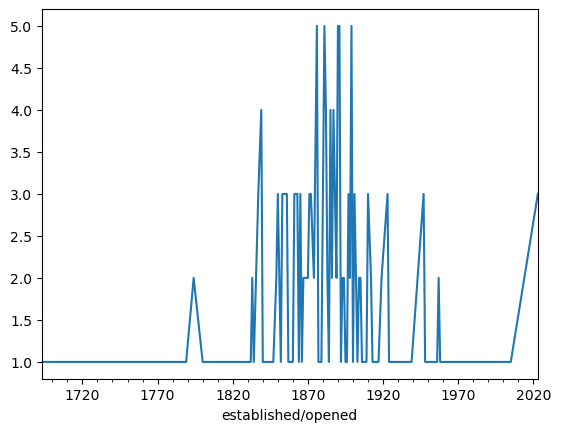

In [1448]:
school_facts["established/opened"] = school_facts["established/opened"].dt.to_period("Y")
school_facts.groupby("established/opened").city.count().plot()

compare relative number of public and private schools

<Axes: ylabel='count'>

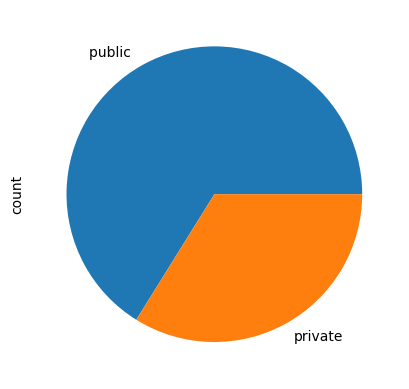

In [1446]:
school_facts.designation.str[:7].value_counts().plot(kind='pie')

## Cleaning Code in as Few Lines as Possible
it's an unreadable method chain extravaganza!

In [1441]:
import requests
import pandas as pd
import numpy as np

with open("university_towns.txt", mode="w") as file:
    file.write(requests.get(
        "https://raw.githubusercontent.com/realpython/python-data-cleaning/refs/heads/master/Datasets/university_towns.txt"
    ).content.decode("utf-8").replace("*", "\n"))

ut_list = []
state = ""
city = ""

with open('university_towns.txt', mode='r') as file:
    
    for line in file:
        
        if "[edit]" in line:
            state = line.strip().replace("[edit]", "")

        elif ":" in line[-2]:
            pass

        elif "Minn" in state and " (" not in line:
            city, school = line.split(", ", maxsplit=1)
            ut_list.append([state, city.strip(), school.replace("\n", "")])

        elif " (" in line:

            city, school_list = line.split(" (", maxsplit=1)
            city.strip()

            # condense three previous if statements into one
            # if comma in city name AND (state is in city name OR city name ends with a comma OR Templetown is mentioned)
            if ", " in city and (set(state).issubset(city[city.index(","):].strip()) or "," in city[-1] or "Templetown" in city):
                city = city.rsplit(",", 1)[0]
               
            elif ")(" in school_list:
                school_list = school_list.replace(")(", ", ")

            school_list = "".join([char for char in school_list if char not in '()[]' and not char.isdigit()]).split(", ")
            
            for s, school in enumerate(school_list):
                
                school = school.strip().removesuffix("\n")

                if school[0].isupper():

                    if "College and" in school:
                        ut_list.append([state, city, school.split(" and ")[0]])
                        ut_list.append([state, city, school.split(" and ")[1].strip(".")])
                        continue

                    if "Cali" in state:

                        if "Whittier" in city:
                            ut_list.append([state, city, "Whittier College"])
                            ut_list.append([state, city, "Rio Hondo College"])
                            continue

                        elif "WesternU" in school:
                            ut_list.append([state, city, "WesternU"])
                            continue
                    
                    if s < len(school_list) - 1:

                        # concatenate all schools and their comma-separated cities at once
                        if set(
                            school_list[s+1].strip()
                        ).issubset(city.strip()) or "Manatee-Sarasota" in school_list[s+1] or 'Sonoma' in school_list[s+1] or set(
                            school_list[s+1].strip()
                        ).issubset('Santa Barbara') or 'Stanislaus' in school_list[s+1]:
                            school = "% s, % s" % (school, school_list[s+1].strip().replace("\n", ""))
                            school_list.pop(s+1)

                    ut_list.append([state, city, school])
                    
                elif school[4].isupper():
                    ut_list.append([state, city, school[4:].replace(".", "")])
                
                else:
                    pass
                    
ut_df = pd.DataFrame(ut_list, columns=["state", "city", "institution"])

# dump closed schools, useless duplicates, and for-profit/support centers
to_drop = pd.Series(["Duluth Business University", "UMDNJ", "College of Saint Rose", "Sage College of Albany", "Wells College", "Marylhurst University",
           "Mercyhurst North East", "University of the Sciences in Philadelphia", "Virginia College", "Memphis College of Art", "DeVry University", 
           "Mildred Elley", "Strayer University", "Everest University", "Averett University", "St Leo University", "Boston College", 
           "Troy University", "Brandeis University", "SUNY Brockport", "University of California, Santa Barbara"])
# towns whose duplicates we want to keep 
# University of California, Santa Barbara, Boston College, Brandeis, SUNY Brockport, Troy University
keep_towns = ["Isla Vista", "Chestnut Hill", "Waltham", "Brockport", "Troy"]
# don't even need a for loop... my favorite line in this entire script
TertiarySchools = ut_df.drop(index=ut_df.loc[ut_df.institution.isin(to_drop) & ~ut_df.city.isin(keep_towns)].index, axis=0)

# make name updates and change names of satellite campuses
outdated = ["Sentera College of Health Sciences", "Castleton State College", "Johnson State College", "Lyndon State College",
       "Humboldt State University", "North Georgia College & State University", "Piedmont College", "Western State College", "Reinhardt College",
       "Boston Conservatory", "Simmons College", "Bridgewater State College", "UMass Medical School", "Doane College",
       "College of Saint Elizabeth", "Excelsior College", "Nazareth College", "St. John Fisher College", "New York Chiropractic College",
       "Upstate Medical University", "Mars Hill College", "Muskingum College", "Linfield College", "Moravian College", 
       "California University of Pennsylvania", "Clarion University of Pennsylvania", "Mercyhurst College", "Converse College",
       "Lynchburg College", "The College of St. Scholastica", "Rutgers University", "University of Rhode Island"]
updated = ["Sentara College of Health Sciences", "Vermont State University", "Vermont State University", "Vermont State University", 
       "Cal Poly, Humboldt", "University of North Georgia", "Piedmont University", "Western Colorado University", "Reinhardt University",
       "Boston Conservatory at Berklee", "Simmons University", "Bridgwater State University", "UMass Chan Medical School", "Doane University",
       "Saint Elizabeth University", "Exelsior University", "Nazareth University", "St. John Fisher University", 
       "Northeast College of Health Sciences", "SUNY Upstate", "Mars Hill University", "Muskingum University", "Linfield University", 
       "Moravian University", "Pennsylvania Western University, California", "Penn West Clarion", "Mercyhurst University", "Converse University",
       "University of Lynchberg", "The College of St. Scholastica in St. Cloud", "Rutgers University-Newark", 
       "Rhode Island Nursing Education Center"]
# towns whose duplicates we want to leave unchanged because they are the main campus
# The College of St. Scholastica, Rutgers, University of Rhode Island
preserve_towns = ["Duluth", "New Brunswick", "Kingston"]
    
for a, z in zip(outdated, updated):
    TertiarySchools.at[
    TertiarySchools.loc[(TertiarySchools.institution == a) & ~TertiarySchools.city.isin(preserve_towns)].index[0], "institution"
    ] = z

# all done! analyze differences with original (unaltered) dataframe
comparison = ut_df.merge(TertiarySchools, 
                      on=["state", "institution"], 
                      how="outer", 
                      suffixes=("_original", "_cleaned"), 
                      indicator="exists", 
                      sort=True)
differences = comparison.loc[comparison.exists != "both"]

def highlight_row(c):
    if pd.notna(c):
        index, col = np.where(differences == c)
        if any(col == 2):
            if differences.iloc[index[0]].exists == "right_only":
                return "color:{0}; font-weight:bold".format("green")
            elif differences.iloc[index[0]].exists == "left_only":
                return "color:{0}; font-weight:bold".format("red")
            else:
                return ""
        else:
            return ""
    else:
        return ""

differences.style.apply(lambda x: differences.map(highlight_row), axis=None)

,state,city_original,institution,city_cleaned,exists
27,California,nan,"Cal Poly, Humboldt",Arcata,right_only
40,California,Arcata,Humboldt State University,nan,left_only
74,Colorado,nan,Western Colorado University,Gunnison,right_only
75,Colorado,Gunnison,Western State College,nan,left_only
120,Georgia,Dahlonega,North Georgia College & State University,nan,left_only
122,Georgia,Demorest,Piedmont College,nan,left_only
123,Georgia,nan,Piedmont University,Demorest,right_only
124,Georgia,Waleska,Reinhardt College,nan,left_only
125,Georgia,nan,Reinhardt University,Waleska,right_only
130,Georgia,nan,University of North Georgia,Dahlonega,right_only


## Yet Another Side Quest
Classify by geographical region and division as defined by the US Census Bureau

Text(0, 0.5, 'schools per region/states per region')

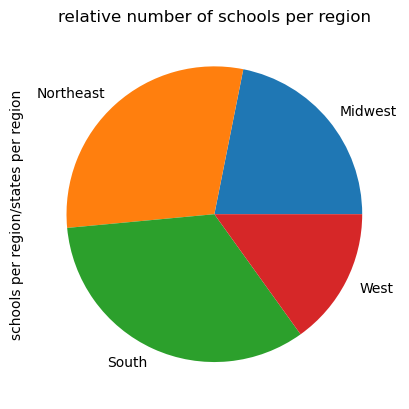

In [1454]:
def by_division(state):
    if any(state in s for s in ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island"]):
        return "New England"
    elif any(state in s for s in ["New Jersey", "New York", "Pennsylvania"]):
        return "Middle Atlantic"
    elif any(state in s for s in ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin"]):
        return "East North Central"
    elif any(state in s for s in ["Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]):
        return "West North Central"
    elif any(state in s for s in ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "West Viginia"]):
        return "South Atlantic"
    elif any(state in s for s in ["Alabama", "Kentucky", "Mississippi", "Tennessee"]):
        return "East South Central"
    elif any(state in s for s in ["Arkansas", "Louisiana", "Oklahoma", "Texas"]):
        return "West South Central"
    elif any(state in s for s in ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming"]):
        return "Mountain"
    else:
        return "Pacific"

def by_region(div):
    if any(div in d for d in ["New England", "Middle Atlantic"]):
        return "Northeast"
    elif any(div in d for d in ["East North Central", "West North Central"]):
        return "Midwest"
    elif any(div in d for d in ["South Atlantic", "East South Central", "West South Central"]):
        return "South"
    else:
        return "West"
        
TertiarySchools["division"] = pd.Categorical(TertiarySchools.state.apply(by_division))
TertiarySchools["region"] = pd.Categorical(TertiarySchools.division.apply(by_region))
TertiarySchools = TertiarySchools[["region", "division"] + [c for c in TertiarySchools.columns if c not in ["region", "division"]]]

# ax = np.divide(ut_df.groupby("region", observed=True).institution.count(), 
# np.array([len(ut_df.loc[ut_df.region == r].state.unique()) for r in ut_df.region.values.unique()]))
# .plot(kind="pie", title="relative regional density of schools over number of states")
pieplot = TertiarySchools.groupby("region", observed=True).institution.count().plot(kind="pie", title="relative number of schools per region")
pieplot.set_ylabel("schools per region/states per region")

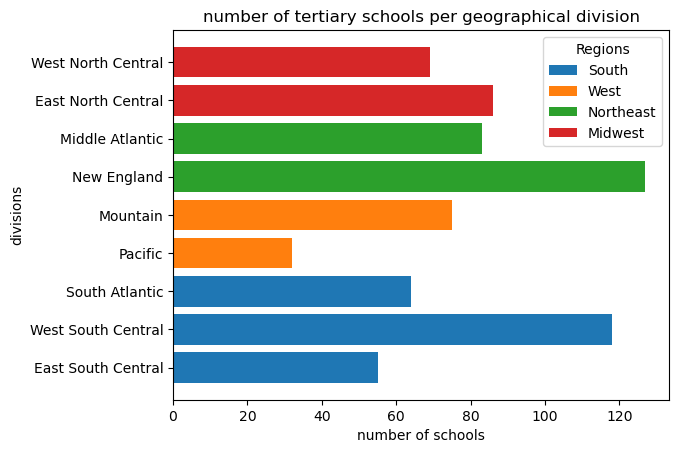

In [1456]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_ylabel("divisions"), ax.set_xlabel("number of schools"), ax.set_title("number of tertiary schools per geographical division")

for r in TertiarySchools.region.values.unique():
    ax = plt.barh(TertiarySchools.loc[TertiarySchools.region == r].division.values.unique(), 
                  TertiarySchools.loc[TertiarySchools.region == r].groupby("division", observed=True).institution.count(), label=r)

plt.legend(title="Regions")

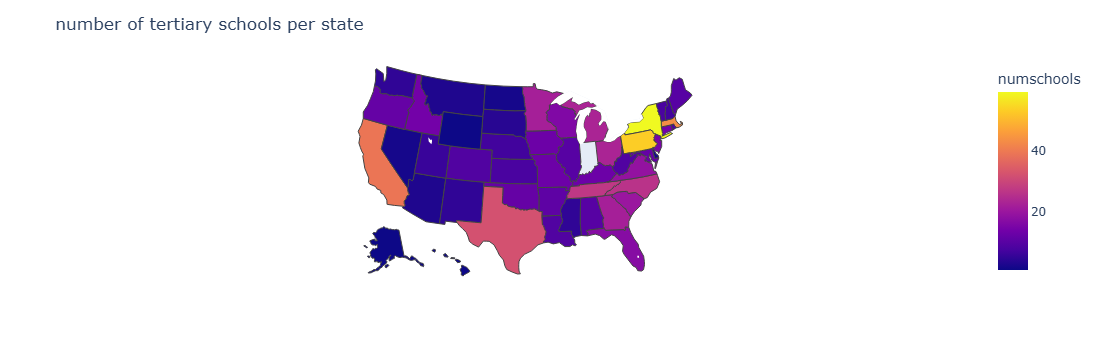

In [1450]:
import plotly.express as px

codes = str(
"AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,HI,ID,IL,ID,IA,KS,KY,LA,ME,MD,MA,MI,MN,MS,MO,MT,NE,NV,NH,NJ,NM,NY,NC,ND,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY"
)

choropleth_data = pd.DataFrame({"state": codes.split(","), "numschools": TertiarySchools.groupby("state").institution.count()})

fig = px.choropleth(choropleth_data, 
                    locations="state", 
                    locationmode="USA-states", 
                    color="numschools", 
                    scope="usa"
                   ).update_layout(title_text='number of tertiary schools per state') 

fig.show()